ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA) — House Prices Dataset

**Dataset used:** `house_prices.csv`



In [13]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv(r"/content/house_prices.csv")

# Quick look
display(df.head())
print("Shape:", df.shape)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


Shape: (187531, 21)


## Check Missing Values

In [14]:
# Missing values (count + percentage)
missing_count = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)

missing_table = pd.DataFrame({
    "missing_count": missing_count,
    "missing_%": missing_pct.round(2)
})

display(missing_table[missing_table["missing_count"] > 0])


,missing_count,missing_%
Plot Area,187531,100.00
Dimensions,187531,100.00
Society,109678,58.49
Super Area,107685,57.42
Car Parking,103357,55.11
overlooking,81436,43.43
Carpet Area,80673,43.02
facing,70233,37.45
Ownership,65517,34.94
Balcony,48935,26.09


## Check Duplicate Rows

In [15]:
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

# If you want to remove duplicates (optional):
# df = df.drop_duplicates().reset_index(drop=True)


Duplicate rows: 0


## No. of Rows and Columns

In [16]:
rows, cols = df.shape
print(f"Rows: {rows:,}")
print(f"Columns: {cols}")


Rows: 187,531
Columns: 21


## Data Types of Columns

In [17]:
display(df.dtypes.to_frame("dtype"))


,dtype
Index,int64
Title,object
Description,object
Amount(in rupees),object
Price (in rupees),float64
location,object
Carpet Area,object
Status,object
Floor,object
Transaction,object


## Descriptive Summary Statistics

In [18]:
# Numeric columns summary
display(df.select_dtypes(include=np.number).describe().T)

# Categorical columns quick summary (top values)
cat_cols = df.select_dtypes(include=["object"]).columns
for c in cat_cols[:8]:  # show a few to keep output readable
    print(f"\n--- {c} (top 10) ---")
    display(df[c].value_counts(dropna=False).head(10))

,count,mean,std,min,25%,50%,75%,max
Index,187531.0,93765.000000,54135.681003,0.0,46882.5,93765.0,140647.5,187530.0
Price (in rupees),169866.0,7583.771885,27241.705819,0.0,4297.0,6034.0,9450.0,6700000.0
Dimensions,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plot Area,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN



--- Title (top 10) ---


,count
Title,
2 BHK Ready to Occupy Flat for sale in Divyasree Elan Sarjapur Road,2106
4 BHK Ready to Occupy Flat for sale in Hamdam Apartment Dwarka Sector 18,1647
2 BHK Ready to Occupy Flat for sale Nayabad,1295
3 BHK Ready to Occupy Flat for sale in Shree Vardhman Victoria Sector 70,1147
3 BHK Ready to Occupy Flat for sale Jagatpur,986
3 BHK Ready to Occupy Flat for sale in Nebula Tower Bodakdev,981
4 BHK Ready to Occupy Flat for sale Kakatiya Hills Vasanth Nagar Colony,955
2 BHK Ready to Occupy Flat for sale Dwarka Mor,847
2 BHK Ready to Occupy Flat for sale Uttam Nagar West,846



--- Description (top 10) ---


,count
Description,
NaN,3023
Multistorey apartment is available for sale. It is a good location property. Please contact for more details.,2732
"Up for immediate sale is a 3 BHK apartment in Dwarka Sector 4, New Delhi. Don't miss this bargain flat for sale. It is housed in the well-planned Sarve Satyam Apartment township in an advantageous location. This is one of the best properties available for resale. You can buy this ready to move flat in Dwarka Sector 4 at a reasonable price of INR 1.92 Cr. This immaculate flat boasts of coming in semi-furnished form which takes the entire deal to the next level. Prominent landmarks in and around this locality are modern convent school.",821
"Have a look at this immaculate 3 BHK flat for sale in Dwarka Sector 10, New Delhi. Well-tucked in the Madhur Jeevan Apartment township, the property is easily accessible. This flat is available as a resale property. You can buy this ready to move flat in Dwarka Sector 10 at a reasonable price of INR 2.10 Cr. This contemporary apartment is semi-furnished. The property is constructed with proximity to major landmarks like near by market and metro station.",821
"One can find this stunning 3 BHK flat for sale in Dwarka Sector 19, New Delhi. It is in a prime location within the Dda Sanskriti Apartments. This premium flat is available for resale at an unbelievable price, so, grab it before it's gone! This apartment in one of the significant areas of Dwarka Sector 19 is ready to move, and can be purchased at the best price of INR 1.56 Cr. The flat is semi-furnished and is suitable for any family size. The flat is easily approachable because it is near to opg world school.",821
"This magnificent 3 BHK Flat is available for sale in Punjabi Bagh West, New Delhi. Invest your valuable money in this flat that is for resale. This apartment in one of the significant areas of Punjabi Bagh West is ready to move, and can be purchased at the best price of INR 2.50 Cr. It is unfurnished to accommodate your needs.",821
"This lovely 2 BHK Flat in Laxmi Nagar, New Delhi is up for sale. This flat all equipped with required facilities, is up for resale. This ready to move flat located in Laxmi Nagar is available for purchase at a fair price of INR 30 Lac. The flat is semi-furnished and makes for an ideal choice for any family. Prominent landmarks in and around this locality are delhi convert school.",821
This ready to move-in 3 BHK flat is available for sale at the premium Devli in New Delhi. Your hunt for the perfect apartment for resale comes to an end here. This apartment ready to move in the Devli is available for an attractive price of INR 60 Lac. This immaculate flat boasts of coming in semi-furnished form which takes the entire deal to the next level. Some of the landmarks in the vicinity include near rising star public school.,821
"This gorgeous 3 BHK Flat is available for sale in Dwarka Sector 22, New Delhi. Strategically situated in the Him Hit Sadbhavna Apartments site, it is placed at a prime location. This is one of the best properties available for resale. The ready to move flat in the prime area of Dwarka Sector 22 is available at a reasonable price of INR 1.89 Cr. The flat is sold in furnished condition. The property is strategically placed near prominent places as near sector 21 metro station which make for the smooth living of residents.",821



--- Amount(in rupees) (top 10) ---


,count
Amount(in rupees),
Call for Price,9684
85 Lac,5264
65 Lac,4229
60 Lac,3869
70 Lac,3801
35 Lac,3369
75 Lac,3144
90 Lac,3143
40 Lac,3098



--- location (top 10) ---


,count
location,
new-delhi,27599
bangalore,24030
kolkata,22380
gurgaon,20070
ahmedabad,12750
hyderabad,12300
chennai,10500
jaipur,8490
greater-noida,4710



--- Carpet Area (top 10) ---


,count
Carpet Area,
NaN,80673
1000 sqft,5285
900 sqft,4649
1300 sqft,3457
1600 sqft,2752
600 sqft,2225
1500 sqft,2151
950 sqft,1940
1250 sqft,1675



--- Status (top 10) ---


,count
Status,
Ready to Move,186916
NaN,615



--- Floor (top 10) ---


,count
Floor,
2 out of 4,12433
1 out of 4,11985
3 out of 4,8792
1 out of 3,7093
NaN,7077
4 out of 4,6253
2 out of 3,6016
3 out of 3,4796
2 out of 5,4741



--- Transaction (top 10) ---


,count
Transaction,
Resale,144172
New Property,42565
Other,709
NaN,83
Rent/Lease,2


# Feature Cleaning / Preparation (for better plots)

This dataset contains some columns stored as text (examples: `"42 Lac"`, `"1.40 Cr"`, `"500 sqft"`, `"10 out of 11"`).
We will create clean numeric versions:
- `amount_rupees` from `Amount(in rupees)`
- `carpet_sqft` from `Carpet Area`
- `floor_current`, `floor_total` from `Floor`


In [19]:
def parse_amount_to_rupees(x):
    """Convert strings like '42 Lac', '1.40 Cr' to rupees (float).
    Returns NaN if it cannot parse.
    """
    if pd.isna(x):
        return np.nan
    s = str(x).strip().lower().replace(",", "")
    # Extract number part
    m = re.search(r"([0-9]*\.?[0-9]+)", s)
    if not m:
        return np.nan
    val = float(m.group(1))
    # Units
    if "cr" in s or "crore" in s:
        return val * 1e7      # 1 crore = 10,000,000
    if "lac" in s or "lakh" in s:
        return val * 1e5      # 1 lakh = 100,000
    # If already looks like rupees (pure number)
    return val

def parse_sqft(x):
    """Convert '500 sqft' -> 500. Returns NaN if cannot parse."""
    if pd.isna(x):
        return np.nan
    s = str(x).lower().replace(",", "").strip()
    m = re.search(r"([0-9]*\.?[0-9]+)", s)
    return float(m.group(1)) if m else np.nan

def parse_floor(x):
    """Convert '10 out of 11' -> (10, 11). Returns (NaN, NaN) if cannot parse."""
    if pd.isna(x):
        return (np.nan, np.nan)
    s = str(x).lower().strip()
    m = re.search(r"(\d+)\s*out\s*of\s*(\d+)", s)
    if not m:
        return (np.nan, np.nan)
    return (float(m.group(1)), float(m.group(2)))

# Create cleaned columns
df["amount_rupees"] = df["Amount(in rupees)"].apply(parse_amount_to_rupees)
df["carpet_sqft"] = df["Carpet Area"].apply(parse_sqft)

floor_parsed = df["Floor"].apply(parse_floor)
df["floor_current"] = floor_parsed.apply(lambda t: t[0])
df["floor_total"] = floor_parsed.apply(lambda t: t[1])

# Also keep numeric 'Price (in rupees)' (already numeric but has missing values)
# We'll focus on 'amount_rupees' as the total listing amount, if present.
display(df[["Amount(in rupees)", "amount_rupees", "Carpet Area", "carpet_sqft", "Floor", "floor_current", "floor_total"]].head(10))
print("Cleaned columns created.")


,Amount(in rupees),amount_rupees,Carpet Area,carpet_sqft,Floor,floor_current,floor_total
0,42 Lac,4200000.0,500 sqft,500.0,10 out of 11,10.0,11.0
1,98 Lac,9800000.0,473 sqft,473.0,3 out of 22,3.0,22.0
2,1.40 Cr,14000000.0,779 sqft,779.0,10 out of 29,10.0,29.0
3,25 Lac,2500000.0,530 sqft,530.0,1 out of 3,1.0,3.0
4,1.60 Cr,16000000.0,635 sqft,635.0,20 out of 42,20.0,42.0
5,45 Lac,4500000.0,NaN,NaN,2 out of 7,2.0,7.0
6,16.5 Lac,1650000.0,550 sqft,550.0,4 out of 5,4.0,5.0
7,60 Lac,6000000.0,NaN,NaN,Ground out of 7,NaN,NaN
8,60 Lac,6000000.0,NaN,NaN,Ground out of 2,NaN,NaN
9,1.60 Cr,16000000.0,900 sqft,900.0,3 out of 27,3.0,27.0


Cleaned columns created.


## Univariate Analysis

### Distribution of Total Amount (amount_rupees)

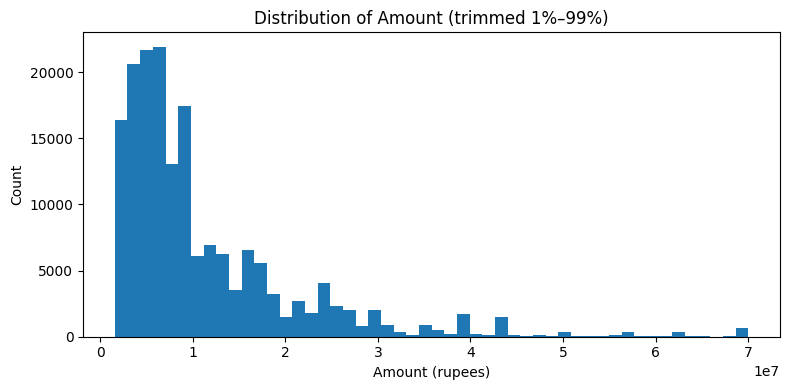

Amount summary (rupees):


,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
amount_rupees,177847.0,1.198134e+07,3.943827e+07,100000.0,4840000.0,7800000.0,14500000.0,24000000.0,33900000.0,70000000.0,1.400300e+10


In [20]:
# Use a trimmed view to make plots readable (remove extreme outliers for visualization only)
amt = df["amount_rupees"].dropna()
if len(amt) > 0:
    p1, p99 = np.percentile(amt, [1, 99])
    amt_trim = amt[(amt >= p1) & (amt <= p99)]

    plt.figure(figsize=(8,4))
    plt.hist(amt_trim, bins=50)
    plt.title("Distribution of Amount (trimmed 1%–99%)")
    plt.xlabel("Amount (rupees)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    print("Amount summary (rupees):")
    display(amt.describe(percentiles=[.25,.5,.75,.9,.95,.99]).to_frame().T)
else:
    print("No parsable values in amount_rupees.")


### Distribution of Carpet Area (sqft)

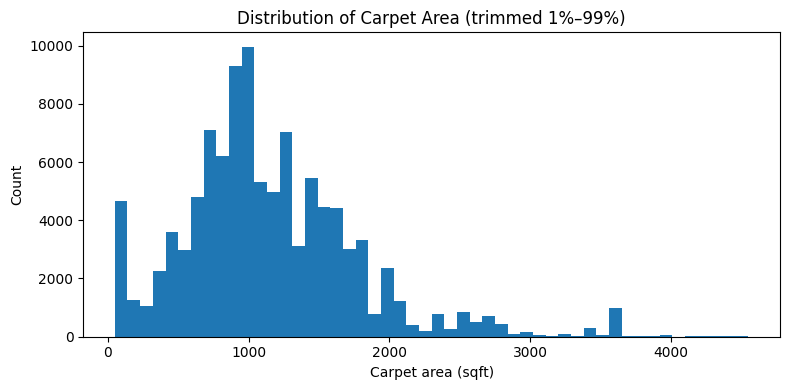

In [21]:
carpet = df["carpet_sqft"].dropna()
if len(carpet) > 0:
    p1, p99 = np.percentile(carpet, [1, 99])
    carpet_trim = carpet[(carpet >= p1) & (carpet <= p99)]

    plt.figure(figsize=(8,4))
    plt.hist(carpet_trim, bins=50)
    plt.title("Distribution of Carpet Area (trimmed 1%–99%)")
    plt.xlabel("Carpet area (sqft)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("No parsable values in carpet_sqft.")


### Top 10 Locations by number of listings

,count
location,
new-delhi,27599
bangalore,24030
kolkata,22380
gurgaon,20070
ahmedabad,12750
hyderabad,12300
chennai,10500
jaipur,8490
greater-noida,4710


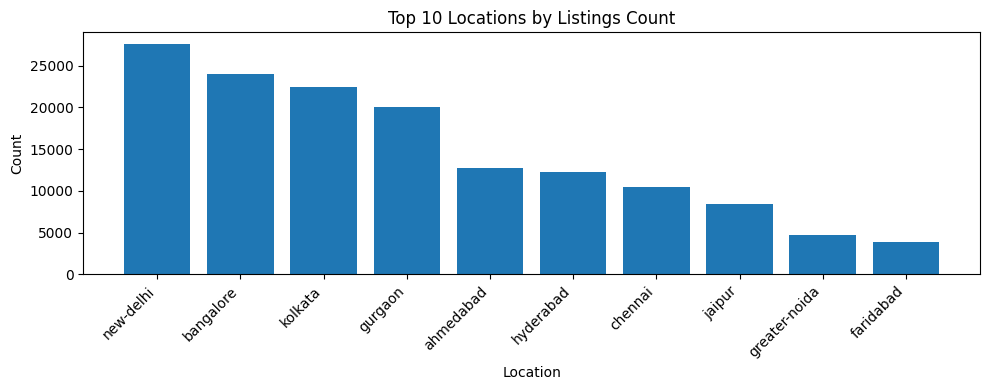

In [22]:
top_locations = df["location"].value_counts().head(10)
display(top_locations.to_frame("count"))

plt.figure(figsize=(10,4))
plt.bar(top_locations.index.astype(str), top_locations.values)
plt.title("Top 10 Locations by Listings Count")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Bivariate Analysis

### Average Amount by Location (Top 10 by listings)

,avg_amount_rupees
location,
gurgaon,2.170470e+07
new-delhi,1.616784e+07
hyderabad,1.526815e+07
chennai,1.139704e+07
ahmedabad,1.027555e+07
bangalore,1.006305e+07
faridabad,8.752084e+06
kolkata,8.707460e+06
greater-noida,7.734287e+06


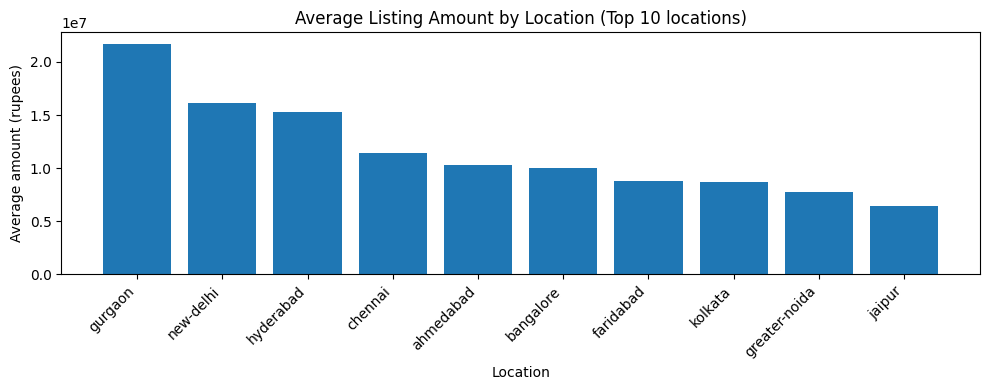

In [23]:
loc_top10 = df["location"].value_counts().head(10).index
tmp = df[df["location"].isin(loc_top10)].copy()

avg_by_loc = tmp.groupby("location")["amount_rupees"].mean().sort_values(ascending=False)
display(avg_by_loc.to_frame("avg_amount_rupees"))

plt.figure(figsize=(10,4))
plt.bar(avg_by_loc.index.astype(str), avg_by_loc.values)
plt.title("Average Listing Amount by Location (Top 10 locations)")
plt.xlabel("Location")
plt.ylabel("Average amount (rupees)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Average Amount by Status

,avg_amount_rupees
Status,
Ready to Move,1.199922e+07


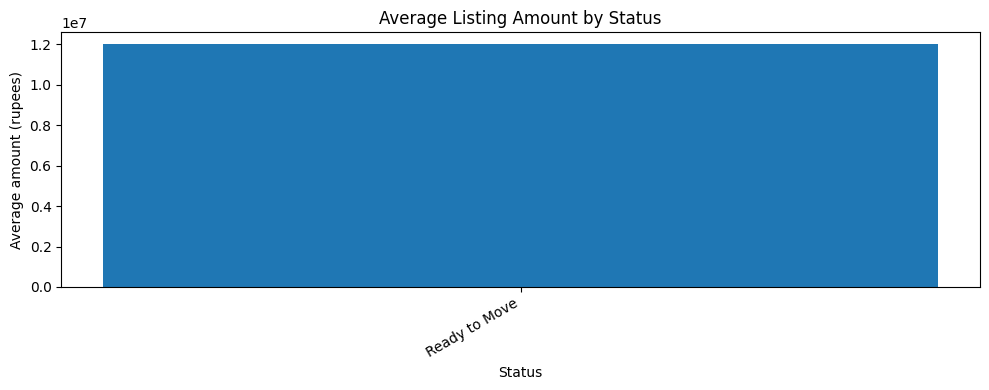

In [24]:
avg_by_status = df.groupby("Status")["amount_rupees"].mean().sort_values(ascending=False)
display(avg_by_status.to_frame("avg_amount_rupees"))

plt.figure(figsize=(10,4))
plt.bar(avg_by_status.index.astype(str), avg_by_status.values)
plt.title("Average Listing Amount by Status")
plt.xlabel("Status")
plt.ylabel("Average amount (rupees)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


### Carpet Area vs Amount (relationship)

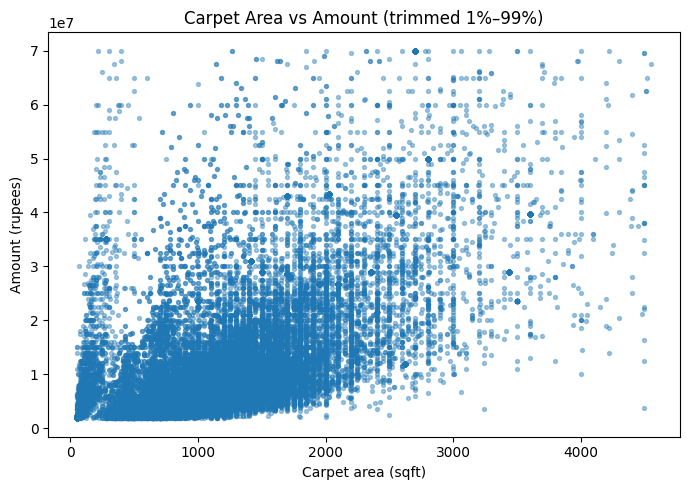

In [25]:
# Scatter with trimming for readability
plot_df = df[["carpet_sqft", "amount_rupees"]].dropna()
if len(plot_df) > 0:
    # Trim for plotting
    a = plot_df["amount_rupees"].values
    c = plot_df["carpet_sqft"].values
    a1, a99 = np.percentile(a, [1, 99])
    c1, c99 = np.percentile(c, [1, 99])
    plot_df = plot_df[(plot_df["amount_rupees"].between(a1, a99)) & (plot_df["carpet_sqft"].between(c1, c99))]

    plt.figure(figsize=(7,5))
    plt.scatter(plot_df["carpet_sqft"], plot_df["amount_rupees"], s=8, alpha=0.4)
    plt.title("Carpet Area vs Amount (trimmed 1%–99%)")
    plt.xlabel("Carpet area (sqft)")
    plt.ylabel("Amount (rupees)")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric data for scatter plot.")


## Correlation Matrix

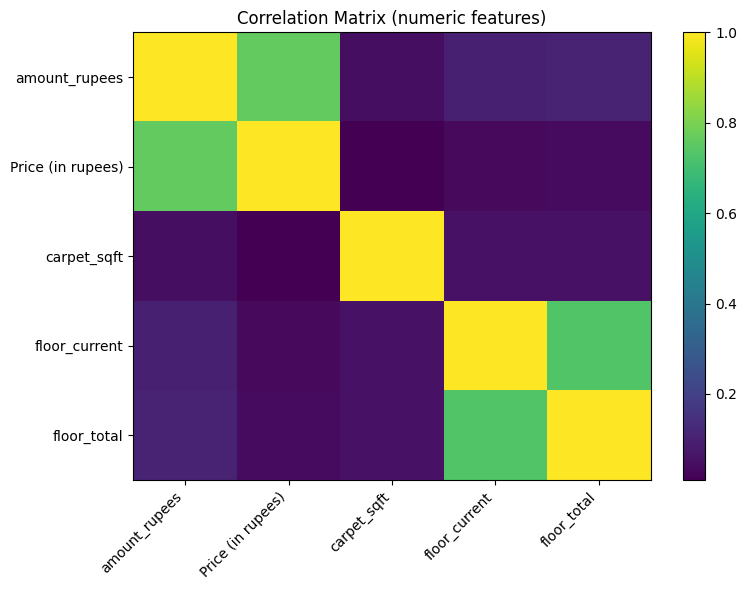

,amount_rupees,Price (in rupees),carpet_sqft,floor_current,floor_total
amount_rupees,1.000000,0.762790,0.047554,0.098444,0.107335
Price (in rupees),0.762790,1.000000,0.009542,0.033117,0.038516
carpet_sqft,0.047554,0.009542,1.000000,0.057715,0.058892
floor_current,0.098444,0.033117,0.057715,1.000000,0.732373
floor_total,0.107335,0.038516,0.058892,0.732373,1.000000


In [26]:
# Select numeric columns for correlation
num_cols = ["amount_rupees", "Price (in rupees)", "carpet_sqft", "Bathroom", "Balcony", "floor_current", "floor_total"]
corr_df = df[num_cols].copy()

corr = corr_df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect="auto")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation Matrix (numeric features)")
plt.colorbar()
plt.tight_layout()
plt.show()

display(corr)


## Time-Based Analysis (Monthly Trend)

This dataset does **not** include a date/time column (e.g., listing date or transaction date), so a **true monthly trend** cannot be computed.

✅ If you have a dataset that contains a date column, we can add:
- convert to datetime
- extract month/year
- group by month and plot trend

For now, this section is intentionally noted as not applicable for this dataset.


# Conclusion

We completed the EDA checklist:
- Identified missing values and duplicates
- Checked shape and data types
- Produced summary statistics for numeric + categorical data
- Built cleaned numeric features for better analysis
- Performed univariate and bivariate analysis with visualizations
- Computed a correlation matrix for key numeric features
